# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Reading  Data

In [3]:
training_set = pd.read_csv('C:/Users/prade/Downloads/aapl_train.csv')

In [14]:
training_set['Date'] = pd.to_datetime(training_set.Date)
training_set.sort_values('Date',inplace=True)

In [15]:
training_set.head()

,Date,Open,High,Low,Close,Volume
2516,2007-01-03,12.33,12.37,11.70,11.97,311433248
2515,2007-01-04,12.01,12.28,11.97,12.24,214031636
2514,2007-01-05,12.25,12.31,12.06,12.15,208817119
2513,2007-01-08,12.28,12.36,12.18,12.21,199431337
2512,2007-01-09,12.35,13.28,12.16,13.22,838036682


## Taking out open price and modifying as tensor

In [16]:
training_set = training_set['Open'].values
type(training_set)

numpy.ndarray

In [17]:
training_set = training_set.reshape(-1,1)

# Normalization

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
sc = MinMaxScaler()

In [20]:
scaled_training_set = sc.fit_transform(training_set)

# Inputs and outputs for the Model

** timesteps = 60**

In [21]:
#empty list
X_train = []
y_train = []

In [22]:
#shape of training set
scaled_training_set.shape

(2517, 1)

In [23]:
for i in range(60,2516):
    X_train.append(scaled_training_set[i-60:i,0])
    y_train.append(scaled_training_set[i,0])

In [24]:
X_train, y_train = np.array(X_train),np.array(y_train)

In [25]:
X_train.shape

(2456, 60)

In [26]:
#reshaping as 3d tensor
X_train = np.reshape(X_train, (2456,60,1))

In [27]:
X_train.shape

(2456, 60, 1)

# Creating RNN

In [28]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

Using TensorFlow backend.


In [29]:
rnnregressor = Sequential()

In [30]:
rnnregressor.add(LSTM(units=3, return_sequences = True, input_shape=(None,1))) #1st layer
rnnregressor.add(LSTM(units=3, return_sequences = True))                       #2nd layer
rnnregressor.add(LSTM(units=3, return_sequences = True))                       #3nd layer
rnnregressor.add(LSTM(units=3))                                                #4nd layer
rnnregressor.add(Dense(units=1))                                              #output layer

In [31]:
#compile
rnnregressor.compile(optimizer='rmsprop', loss = 'mean_squared_error')

In [35]:
#Fitting
rnnregressor.fit(X_train,y_train, epochs=100, batch_size= 32)

Epoch 1/100
2456/2456 [==============================] - 20s - loss: 0.1337    
Epoch 2/100
2456/2456 [==============================] - 13s - loss: 0.0190    
Epoch 3/100
2456/2456 [==============================] - 11s - loss: 0.0021    
Epoch 4/100
2456/2456 [==============================] - 11s - loss: 0.0013    
Epoch 5/100
2456/2456 [==============================] - 11s - loss: 0.0012    
Epoch 6/100
2456/2456 [==============================] - 10s - loss: 0.0011    
Epoch 7/100
2456/2456 [==============================] - 11s - loss: 0.0011    
Epoch 8/100
2456/2456 [==============================] - 12s - loss: 9.7799e-04    
Epoch 9/100
2456/2456 [==============================] - 13s - loss: 9.6324e-04    
Epoch 10/100
2456/2456 [==============================] - 11s - loss: 9.9306e-04    
Epoch 11/100
2456/2456 [==============================] - 13s - loss: 8.9392e-04    
Epoch 12/100
2456/2456 [==============================] - 13s - loss: 8.3526e-04    
Epoch 13/100
2456

In [36]:
test_set = pd.read_csv('C:/Users/prade/Downloads/AAPL_test.csv')

In [37]:
test_set['Date'] = pd.to_datetime(test_set.Date)
test_set.sort_values('Date',inplace=True)

In [38]:
test_set.head()

,Date,Open,High,Low,Close,Volume
102,2017-01-03,115.80,116.33,114.76,116.15,28781865
101,2017-01-04,115.85,116.51,115.75,116.02,21118116
100,2017-01-05,115.92,116.86,115.81,116.61,22193587
99,2017-01-06,116.78,118.16,116.47,117.91,31751900
98,2017-01-09,117.95,119.43,117.94,118.99,33561948


In [39]:
test_set.shape

(103, 6)

In [40]:
real_price = test_set.iloc[:,1:2].values

In [41]:
real_price = np.concatenate((training_set[0:2456], real_price),axis=0)

## Scaling test set

In [42]:
scaled_real_price = sc.fit_transform(real_price)

In [43]:
#preparing inputs
inputs= []

In [44]:
for i in range(2456, 2559):
    inputs.append(scaled_real_price[i-60:i,0])

In [45]:
inputs = np.array(inputs)

In [46]:
inputs.shape[1]

60

In [47]:
inputs = np.reshape(inputs, (inputs.shape[0], inputs.shape[1],1))

# Predicting

In [48]:
predict = rnnregressor.predict(inputs)

In [49]:
predict = sc.inverse_transform(predict)

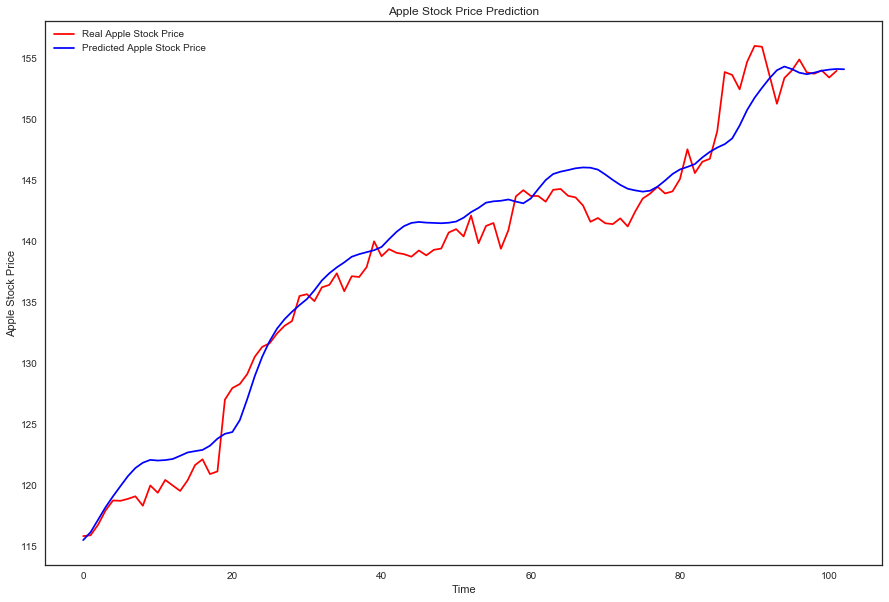

In [50]:
sns.set_style('white')
plt.figure(figsize=(15,10))
plt.plot(real_price[2457:], color = 'red', label = 'Real Apple Stock Price')
plt.plot(predict, color = 'blue', label = 'Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()